## Trying Lantana Polygon updates in Python

Using Geopandas

Feature classes can be imported using GeoPandas by using read_file() command. It uses Python's Fiona package which leverages a collection of drivers that provide access to a numver of geospatial data formats. Geopandas simplifies the usage of Fiona commands, making import and export of geodataframes easier to use.

In [1]:
# import geopandas
import geopandas as gpd

In [45]:
# Create a variable pointing to the shapefile
LantPoly= 'C:/Columbia/Spring2021/DirectedResearch/Data/classification/NewTrainingData/Feb2023/LantanaFeb2023.shp'
FallowPoly= 'C:/Columbia/Spring2021/DirectedResearch/Data/classification/NewTrainingData/Feb2023/fallowMergeNewNoldPlusNewFeb.shp'
ForestPoly= 'C:/Columbia/Spring2021/DirectedResearch/Data/classification/NewTrainingData/FinalTrainingDataNov28/ForestNewNOld28Nov.shp'
WaterPoly= 'C:/Columbia/Spring2021/DirectedResearch/Data/classification/NewTrainingData/FinalTrainingDataNov28/WaterNewNOld28Nov.shp'
CropPoly= 'C:/Columbia/Spring2021/DirectedResearch/Data/classification/NewTrainingData/FinalTrainingDataNov28/CropOldNNewmerge28Nov.shp'
BuiltPoly= 'C:/Columbia/Spring2021/DirectedResearch/Data/classification/NewTrainingData/Feb2023/BuiltUpFeb2023.shp'
RegenPoly= 'C:/Columbia/Spring2021/DirectedResearch/Data/classification/NewTrainingData/FinalTrainingDataNov28/Regen20s83Merge.shp'


In [46]:
# read the shapefile directly into a geodataframe
gdf_LantROI= gpd.read_file(LantPoly)
gdf_FallowROI= gpd.read_file(FallowPoly)
gdf_ForestROI= gpd.read_file(ForestPoly)
gdf_WaterROI= gpd.read_file(WaterPoly)
gdf_CropROI= gpd.read_file(CropPoly)
gdf_BuiltROI= gpd.read_file(BuiltPoly)
gdf_RegenROI= gpd.read_file(RegenPoly)

## Exploring the Geodataframe

In [9]:
# view first five rows
gdf_LantROI.head()

,landcover,label,UID,geometry
0,2,Lantana,0,"POLYGON ((80.66558 22.44114, 80.66586 22.44100..."
1,2,Lantana,1,"POLYGON ((80.66232 22.44162, 80.66279 22.44135..."
2,2,Lantana,2,"POLYGON ((80.70577 22.42839, 80.70606 22.42842..."
3,2,Lantana,3,"POLYGON ((80.70878 22.40295, 80.70946 22.40363..."
4,2,Lantana,4,"POLYGON ((80.81543 22.39629, 80.81603 22.39623..."


In [10]:
gdf_LantROI.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   landcover  89 non-null     int64   
 1   label      81 non-null     object  
 2   UID        89 non-null     int64   
 3   geometry   89 non-null     geometry
dtypes: geometry(1), int64(2), object(1)
memory usage: 2.9+ KB


In [11]:
gdf_LantROI.loc[10]

landcover                                                    2
label                                                  Lantana
UID                                                         10
geometry     POLYGON ((80.67636029485341 22.44417639582543,...
Name: 10, dtype: object

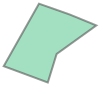

In [12]:
gdf_LantROI.loc[10, 'geometry']

<AxesSubplot:>

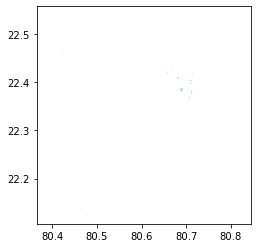

In [13]:
#display as simple polygon FC
gdf_LantROI.plot()

<AxesSubplot:>

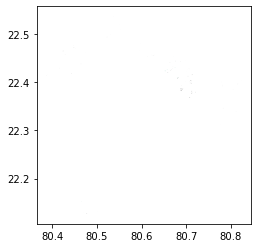

In [14]:
gdf_LantROI.plot('landcover', cmap='Set2')

In [15]:
gdf_LantROI.tail()

,landcover,label,UID,geometry
84,0,None,84,"POLYGON ((80.67455 22.43027, 80.67531 22.43030..."
85,0,None,85,"POLYGON ((80.65723 22.42607, 80.65768 22.42592..."
86,0,None,86,"POLYGON ((80.65207 22.42332, 80.65265 22.42369..."
87,0,None,87,"POLYGON ((80.67226 22.45327, 80.67233 22.45334..."
88,0,None,88,"POLYGON ((80.55076 22.51989, 80.55081 22.51995..."


In [16]:
gdf_LantROI['label'].fillna('Lantana', inplace=True)
gdf_LantROI.tail()

,landcover,label,UID,geometry
84,0,Lantana,84,"POLYGON ((80.67455 22.43027, 80.67531 22.43030..."
85,0,Lantana,85,"POLYGON ((80.65723 22.42607, 80.65768 22.42592..."
86,0,Lantana,86,"POLYGON ((80.65207 22.42332, 80.65265 22.42369..."
87,0,Lantana,87,"POLYGON ((80.67226 22.45327, 80.67233 22.45334..."
88,0,Lantana,88,"POLYGON ((80.55076 22.51989, 80.55081 22.51995..."


In [17]:
gdf_LantROI.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

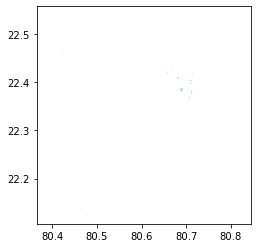

In [18]:
gdf_LantROI.plot()

In [47]:
gdfLantTrain= gdf_LantROI.sample(frac = 0.7)
gdf_FallowTrain =gdf_FallowROI.sample(frac = 0.7)
gdf_ForestTrain = gdf_ForestROI.sample(frac = 0.7)
gdf_WaterTrain = gdf_WaterROI.sample(frac = 0.7)
gdf_CropTrain = gdf_CropROI.sample(frac = 0.7)
gdf_BuiltTrain = gdf_BuiltROI.sample(frac = 0.7)
gdf_RegenTrain = gdf_RegenROI.sample(frac = 0.7)

#obtained from https://www.geeksforgeeks.org/divide-a-pandas-dataframe-randomly-in-a-given-ratio/

In [48]:
gdfLantValidation= gdf_LantROI.drop(gdfLantTrain.index)
gdf_FallowValid= gdf_FallowROI.drop(gdf_FallowTrain.index)
gdf_ForestValid= gdf_ForestROI.drop(gdf_ForestTrain.index)
gdf_WaterValid= gdf_WaterROI.drop(gdf_WaterTrain.index)
gdf_CropValid= gdf_CropROI.drop(gdf_CropTrain.index)
gdf_BuiltValid= gdf_BuiltROI.drop(gdf_BuiltTrain.index)
gdf_RegenValid= gdf_RegenROI.drop(gdf_RegenTrain.index)

In [29]:
len(gdf_LantROI)


89

In [35]:
len(gdfLantTrain)
gdfLantTrain

,landcover,label,UID,geometry
47,2,Lantana,47,"POLYGON ((80.46408 22.43772, 80.46436 22.43773..."
55,2,Lantana,55,"POLYGON ((80.71971 22.37944, 80.72041 22.37984..."
82,0,Lantana,82,"POLYGON ((80.82437 22.40347, 80.82442 22.40349..."
38,2,Lantana,38,"POLYGON ((80.71039 22.39775, 80.71167 22.39843..."
59,2,Lantana,59,"POLYGON ((80.62632 22.45543, 80.62654 22.45580..."
...,...,...,...,...
31,2,Lantana,31,"POLYGON ((80.66487 22.42511, 80.66531 22.42500..."
45,2,Lantana,45,"POLYGON ((80.55325 22.50910, 80.55329 22.50909..."
18,2,Lantana,18,"POLYGON ((80.71162 22.38071, 80.71147 22.38152..."
22,2,Lantana,22,"POLYGON ((80.68010 22.40702, 80.67957 22.40779..."


In [33]:
len(gdfLantValidation)

27

## Write training and validation polygons to file

In [38]:
gdfLantTrain.to_file("C:/Columbia/Spring2021/DirectedResearch/Data/classification/NewTrainingData/Feb2023/LantTrainingJuly2023.shp")

In [39]:
gdfLantValidation.to_file("C:/Columbia/Spring2021/DirectedResearch/Data/classification/NewTrainingData/Feb2023/LantValidationJuly2023.shp")

In [49]:

#gdfLantTrain.to_file("C:/Columbia/Spring2021/DirectedResearch/Data/classification/NewTrainingData/Feb2023/LantTrainingJuly2023.shp")
gdf_FallowTrain.to_file("C:/Columbia/Spring2021/DirectedResearch/Data/classification/NewTrainingData/Feb2023/FallowTrainingJuly2023.shp")
gdf_ForestTrain.to_file("C:/Columbia/Spring2021/DirectedResearch/Data/classification/NewTrainingData/Feb2023/ForestTrainingJuly2023.shp")

gdf_WaterTrain.to_file("C:/Columbia/Spring2021/DirectedResearch/Data/classification/NewTrainingData/Feb2023/WaterTrainingJuly2023.shp")

gdf_CropTrain.to_file("C:/Columbia/Spring2021/DirectedResearch/Data/classification/NewTrainingData/Feb2023/CropTrainingJuly2023.shp")
gdf_BuiltTrain.to_file("C:/Columbia/Spring2021/DirectedResearch/Data/classification/NewTrainingData/Feb2023/BuiltTrainingJuly2023.shp")

gdf_RegenTrain.to_file("C:/Columbia/Spring2021/DirectedResearch/Data/classification/NewTrainingData/Feb2023/RegenTrainingJuly2023.shp")


In [50]:
#gdfLantTrain.to_file("C:/Columbia/Spring2021/DirectedResearch/Data/classification/NewTrainingData/Feb2023/LantTrainingJuly2023.shp")
gdf_FallowValid.to_file("C:/Columbia/Spring2021/DirectedResearch/Data/classification/NewTrainingData/Feb2023/FallowValidationJuly2023.shp")
gdf_ForestValid.to_file("C:/Columbia/Spring2021/DirectedResearch/Data/classification/NewTrainingData/Feb2023/ForestValidationJuly2023.shp")

gdf_WaterValid.to_file("C:/Columbia/Spring2021/DirectedResearch/Data/classification/NewTrainingData/Feb2023/WaterValidationJuly2023.shp")

gdf_CropValid.to_file("C:/Columbia/Spring2021/DirectedResearch/Data/classification/NewTrainingData/Feb2023/CropValidationJuly2023.shp")
gdf_BuiltValid.to_file("C:/Columbia/Spring2021/DirectedResearch/Data/classification/NewTrainingData/Feb2023/BuiltValidationJuly2023.shp")

gdf_RegenValid.to_file("C:/Columbia/Spring2021/DirectedResearch/Data/classification/NewTrainingData/Feb2023/RegenValidationJuly2023.shp")
